In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

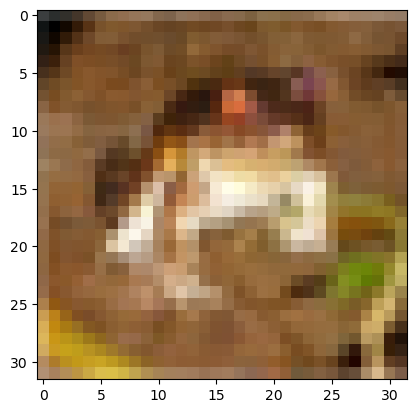

In [4]:
# FROG
plt.imshow(x_train[0])

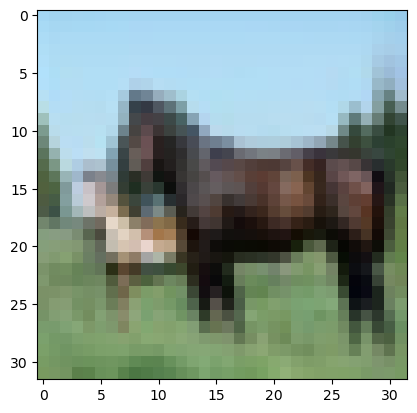

In [5]:
# HORSE
plt.imshow(x_train[12])

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [15]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 15s 5ms/step - loss: 1.5379 - accuracy: 0.4487 - val_loss: 1.2890 - val_accuracy: 0.5396
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1708 - accuracy: 0.5889 - val_loss: 1.1106 - val_accuracy: 0.6154
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0289 - accuracy: 0.6417 - val_loss: 1.4314 - val_accuracy: 0.5205
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9251 - accuracy: 0.6782 - val_loss: 1.0450 - val_accuracy: 0.6492
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8421 - accuracy: 0.7101 - val_loss: 1.0661 - val_accuracy: 0.6513
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7821 - accuracy: 0.7304 - val_loss: 1.0296 - val_accuracy: 0.6769
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7251 - accuracy: 0.7518 - val_loss: 1.0394 - val_accuracy

In [16]:
losses = pd.DataFrame(model.history.history)

In [17]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.537916,0.44874,1.289035,0.5396
1,1.170808,0.58886,1.110589,0.6154
2,1.028860,0.64174,1.431396,0.5205
3,0.925117,0.67824,1.044989,0.6492
4,0.842074,0.71008,1.066130,0.6513


<AxesSubplot:>

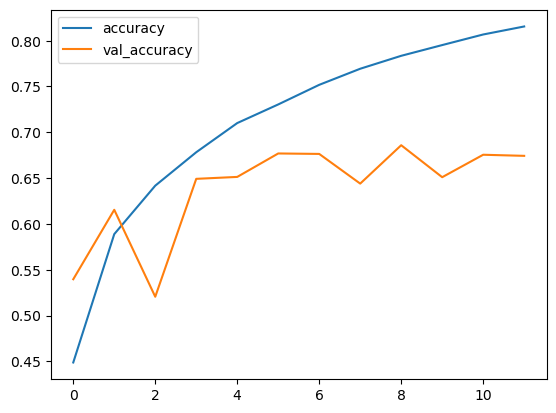

In [18]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

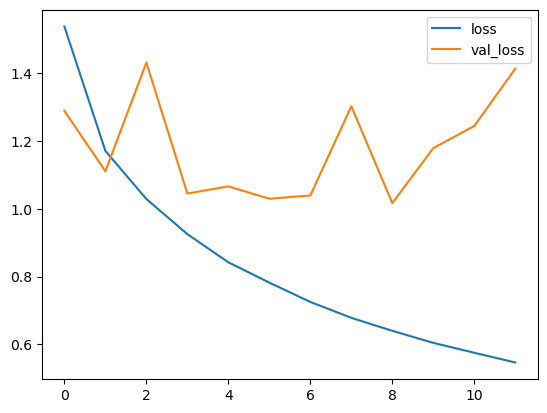

In [19]:
losses[['loss','val_loss']].plot()

In [20]:
model.metrics_names

['loss', 'accuracy']

In [21]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.4135501384735107, 0.6743000149726868]


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1000
           1       0.80      0.79      0.79      1000
           2       0.44      0.75      0.55      1000
           3       0.56      0.41      0.47      1000
           4       0.70      0.56      0.62      1000
           5       0.65      0.52      0.57      1000
           6       0.83      0.71      0.77      1000
           7       0.74      0.74      0.74      1000
           8       0.80      0.75      0.77      1000
           9       0.77      0.72      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



In [33]:
confusion_matrix(y_test,predictions)

array([[797,  12,  83,   6,  13,   5,   2,   5,  56,  21],
       [ 45, 788,  14,   6,   2,   2,   6,   6,  30, 101],
       [ 60,   6, 750,  30,  43,  33,  35,  22,  13,   8],
       [ 28,  13, 206, 412,  60, 148,  49,  47,  20,  17],
       [ 41,   7, 181,  60, 560,  28,  25,  81,  15,   2],
       [ 24,  11, 197, 115,  35, 517,  16,  62,   9,  14],
       [ 12,   9, 120,  66,  30,  21, 714,  12,   3,  13],
       [ 24,  10,  99,  27,  51,  32,   3, 740,   3,  11],
       [132,  37,  33,   6,   3,   5,   4,   9, 746,  25],
       [ 63,  98,  40,  13,   3,   8,   7,  13,  36, 719]], dtype=int64)

<AxesSubplot:>

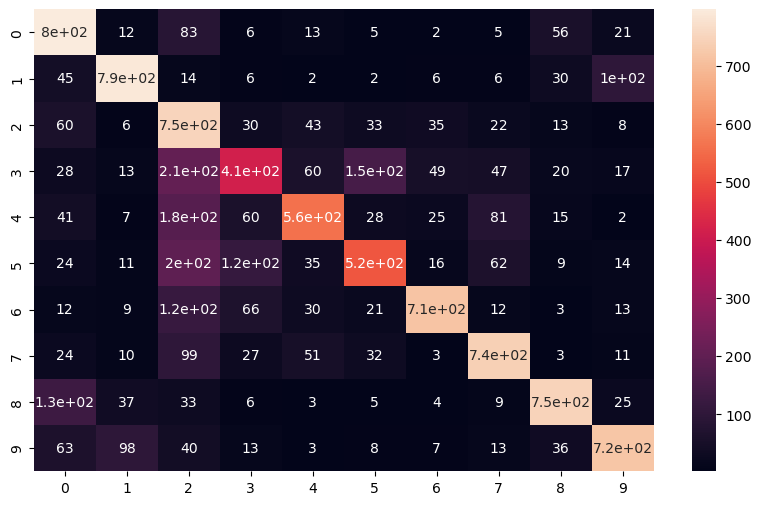

In [34]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [35]:
my_image = x_test[16]

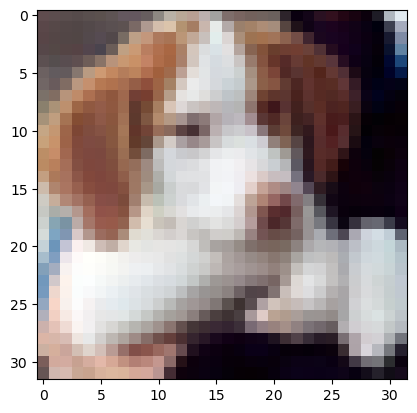

In [36]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)))

1/1 [==============================] - 0s 18ms/step


5

In [42]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html